In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
ls

sample_data/


In [ ]:
pwd

'/content'

In [ ]:
cd ..

/


In [ ]:
cd /gdrive/MyDrive/sharing/datasets/

/gdrive/.shortcut-targets-by-id/1vgLEWOrENmroixxdtRAtja6TOOv5IV6B/sharing/datasets


In [ ]:
ls

organmnist_axial.npz


In [ ]:
pwd

'/gdrive/.shortcut-targets-by-id/1vgLEWOrENmroixxdtRAtja6TOOv5IV6B/sharing/datasets'

In [ ]:
import numpy as np
import pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data = np.load('/gdrive/MyDrive/sharing/datasets/organmnist_axial.npz')

In [ ]:
list(data)

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [ ]:
train_images = data['train_images']
train_labels = data['train_labels']
train_images = train_images[...,None]
train_images.shape,train_labels.shape

((34581, 28, 28, 1), (34581, 1))

In [ ]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

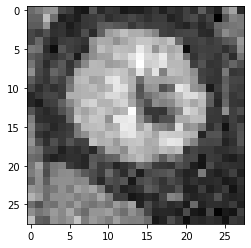

In [ ]:
plt.imshow(train_images[11335],cmap='gray')

In [ ]:
input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)
# x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(11, activation="softmax")(x)


model = keras.Model(input, output, name="classifier")

In [ ]:

model.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_5 (Glob (None, 16)                0

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(train_images,train_labels, batch_size=64, epochs=2, validation_split=0.2)


Epoch 1/2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


433/433 [==============================] - 34s 77ms/step - loss: 1.9325 - accuracy: 0.4470 - val_loss: 1.5249 - val_accuracy: 0.4868
Epoch 2/2
433/433 [==============================] - 33s 76ms/step - loss: 0.9293 - accuracy: 0.6637 - val_loss: 0.8955 - val_accuracy: 0.6822


In [ ]:
val_images = data['val_images']
val_labels = data['val_labels']
val_images = val_images[...,None]
val_images.shape,val_labels.shape

((6491, 28, 28, 1), (6491, 1))

In [ ]:

test_scores = model.evaluate(val_images, val_labels, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

203/203 - 2s - loss: 0.6888 - accuracy: 0.7780
Test loss: 0.688789427280426
Test accuracy: 0.7780002951622009
